<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/polynomial_regression_in_stock_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Install and Import Dependencies

In [1]:
!pip install yfinance


# Import the necessay libraries

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Download last 60 days of data
stock = yf.download('AAPL', period='60d', interval='1d')

# Show the top rows
stock.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-03-20,213.819611,217.205170,211.942068,213.709754,48862900
2025-03-21,217.984146,218.553392,211.003295,211.282927,94127800
2025-03-24,220.440918,221.189936,218.293740,220.710569,44299500
2025-03-25,223.456970,223.806518,219.791778,220.480877,34493600
2025-03-26,221.239868,224.725303,220.181259,223.217271,34466100


In [4]:
# Reset index to use day numbers
stock = stock.reset_index()

# Use day numbers as X
X = np.arange(len(stock)).reshape(-1, 1)
y = stock['Close'].values

In [5]:
# Degree of the polynomial (start with 3)
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)


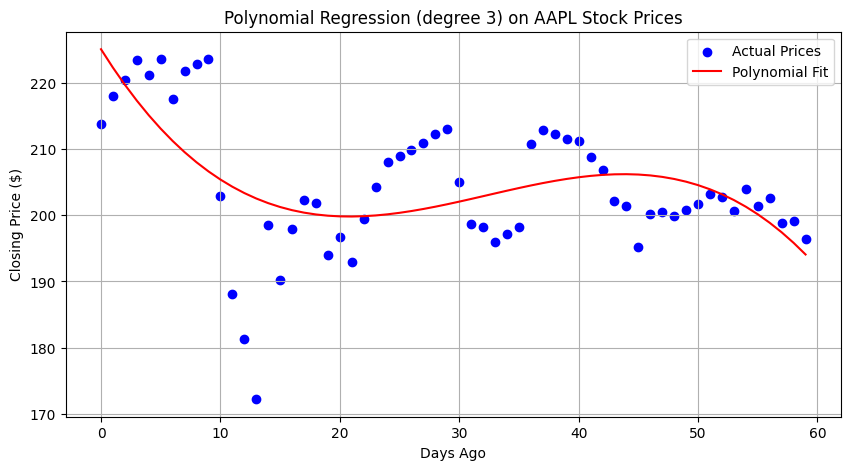

In [6]:
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.title(f'Polynomial Regression (degree {degree}) on AAPL Stock Prices')
plt.xlabel('Days Ago')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()
